In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
df_data = pd.read_excel(r'../data/project_data.xlsx',sheet_name = 'volitylity clustering',header=0)

In [5]:
df_data.head()

,s&p,JNJ,PFE,s&p-date,JNJ-date,PFE - date,vol_S&P500,sp_500_First lable,vol_JNJ,JNJ_First lable,vol_PFE,PFE_First lable,Unnamed: 12,Unnamed: 13,S&P,JNJ.1,PFE.1
0,-0.000128,0.00263,0.010902,2012-08-13,2012-08-13,2012-08-13,0.002649,3.0,0.002959,1.0,0.006586,2.0,fact7,corr [return and var],0.037919,-0.047538,0.024533
1,0.001139,-0.00423,0.002499,2012-08-14,2012-08-14,2012-08-14,0.004779,3.0,0.001036,1.0,0.006601,2.0,fact8,skew,-0.269556,-0.477687,0.315395
2,0.007075,-0.00220,-0.000832,2012-08-15,2012-08-15,2012-08-15,0.004162,3.0,0.002035,1.0,0.003157,1.0,NaN,NaN,NaN,NaN,NaN
3,0.001870,-0.00588,-0.009621,2012-08-16,2012-08-16,2012-08-16,0.008036,3.0,0.003160,1.0,0.007579,2.0,NaN,NaN,NaN,NaN,NaN
4,-0.000007,-0.00049,0.001677,2012-08-17,2012-08-17,2012-08-17,0.006407,3.0,0.006599,2.0,0.008950,2.0,NaN,NaN,NaN,NaN,NaN


In [6]:
def removenan(l):
    removedlist = []
    for i in l:
        if str(i) != 'nan':
            #if i < 0.03:
            removedlist.append(i)
    return removedlist           

In [7]:
###remove the nan
return_sp = removenan(df_data['s&p'].to_list())
return_JNJ = removenan(df_data['JNJ'].to_list())
return_PFE = removenan(df_data['PFE'].to_list())

date_sp500 = removenan(df_data['s&p-date'].to_list())
date_JNJ = removenan(df_data['JNJ-date'].to_list())
date_PFE = removenan(df_data['PFE - date'].to_list())

In [9]:
#get vol in m n 

def get_vol(data,m,n):
    d = []
    v = []
    for i in range(0, len(data), n):
        if len(data)-i >= m:
            d.append(data[i:i+m]) 
    for i in d:
         v.append(np.std(i))  
    return v 

def get_date(data,n):
    date = []
    for i in range(0, len(data), n):
            date.append(data[i]) 
    return date
        

In [10]:
### get vol,25,5

vol_sp500 = get_vol(return_sp,25,5)
vol_JNJ = get_vol(return_JNJ,25,5)
vol_PFE = get_vol(return_PFE,25,5)

dates_sp500 = get_date(date_sp500,5)
dates_JNJ = get_date(date_JNJ,5)
dates_PFE = get_date(date_PFE,5)

df_date = pd.DataFrame (dates_JNJ, columns = ['dates_JNJ'])
df_date['dates_sp500'] = pd.Series(dates_sp500)
df_date['dates_PFE'] = pd.Series(dates_PFE)

#df_date.tail()

#df_date.to_excel( 'date_825 2.xlsx' )

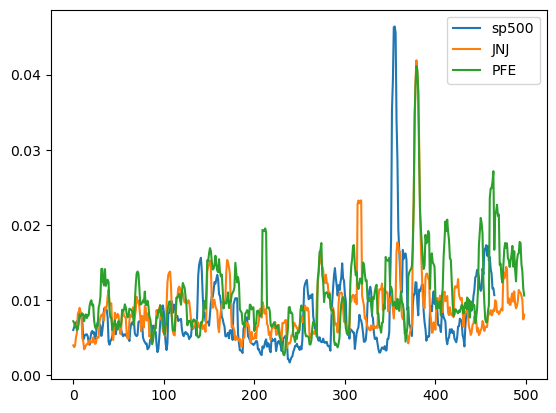

In [12]:
plt.plot(vol_sp500,label='sp500')
plt.plot(vol_JNJ,label='JNJ')
plt.plot(vol_PFE,label='PFE')
plt.legend()

#results1 = {'sp500': vol_sp500, 'JNJ': vol_JNJ, 'PFE': vol_JNJ}
#plt.plot(results1)

In [13]:
###first label with 15%,45%,75%
def first_label(data) :
    #get quantile
    cutoff1,cutoff2,cutoff3 = np.quantile(data, .15), np.quantile(data, .45),np.quantile(data, .75)
    label = []
   
    for i in data:
        lable_1,lable_2,lable_3 = abs(i - cutoff1),abs(i - cutoff2),abs(i - cutoff3)
        least = min(lable_1,lable_2,lable_3)
        if least == lable_1:
            label .append(1)
        elif least == lable_2:
            label .append(2)
        else:
            label.append(3)
            
    label_dict = dict(zip(data,label))
      
    return label_dict

### relabel with new centers
def re_label(data,c) :

    label = []
    for i in data:
        lable_1,lable_2,lable_3 = abs(i - c[0]),abs(i - c[1]),abs(i - c[2])
        least = min(lable_1,lable_2,lable_3)
        if least == lable_1:
            label .append(1)
        elif least == lable_2:
            label .append(2)
        else:
            label.append(3)
          
    label_dict = dict(zip(data,label))
      
    return label_dict

In [20]:
# first_label(vol_sp500print)

In [14]:
###get new cluster centers:50% percentile

def group3(label_dict):
    group1,group2,group3 = [],[],[] 
    for i in label_dict:
        if label_dict[i] == 1:
            group1.append(i)
        elif label_dict[i] == 2:
            group2.append(i)
        else:
            group3.append(i)
    grp_list = [group1,group2,group3] 
    
    return grp_list

def new_centers(label_dict):
    centers = [] 
    for grp in group3(label_dict):
        centers.append(np.quantile(grp, .5))
    return centers

In [15]:
## first center label
c_sp500 = new_centers(first_label(vol_sp500))
c_JNJ = new_centers(first_label(vol_JNJ))
c_PFE = new_centers(first_label(vol_PFE))


sp500_first_label = first_label(vol_sp500)
JNJ_first_label = first_label(vol_JNJ)
PFE_first_label = first_label(vol_PFE)

In [16]:
## second center
c_sp500 = new_centers(re_label(vol_sp500,c_sp500))
c_JNJ = new_centers(re_label(vol_sp500,c_JNJ))
c_PFE = new_centers(re_label(vol_PFE,c_PFE))

In [17]:
### clustering , iteration 
def cluster_center(v,c):
    last_c = c
    new_c = new_centers(re_label(v,c))
    while last_c != new_c :
        last_c = new_c.copy()
        new_c = new_centers(re_label(v,last_c))
    
    return new_c,re_label(v,new_c)


In [18]:
### stable center and last label

new_center_sp500, sp500_last_label = cluster_center(vol_sp500,c_sp500)
new_center_JNJ, JNJ_last_label = cluster_center(vol_JNJ,c_JNJ)
new_center_PFE, PFE_last_label = cluster_center(vol_PFE,c_PFE)

In [19]:
#label_data_df.head()
print(new_center_sp500)
#print(sp500_last_label)

[0.004636001498130224, 0.007219592153158105, 0.012174215708381949]


In [20]:
label_sp500_df = pd.DataFrame({'sp500_first_label':pd.Series(sp500_first_label),'sp500_last_label':pd.Series(sp500_last_label)})
label_JNJ_df = pd.DataFrame({'JNJ_first_label':pd.Series(JNJ_first_label),'JNJ_last_label':pd.Series(JNJ_last_label)})
label_PFE_df = pd.DataFrame({'PFE_first_label':pd.Series(PFE_first_label),'PFE_last_label':pd.Series(PFE_last_label)})

In [21]:
label_JNJ_df

,JNJ_first_label,JNJ_last_label
0.003966,1,1
0.003731,1,1
0.003913,1,1
0.005052,1,1
0.005602,1,1
...,...,...
0.010975,3,2
0.010549,3,2
0.010029,3,2
0.007421,2,1


In [22]:
label_sp500_df

,sp500_first_label,sp500_last_label
0.006011,2,2
0.006391,2,2
0.006798,2,2
0.006964,2,2
0.007182,2,2
...,...,...
0.014117,3,3
0.013520,3,3
0.011531,3,3
0.011560,3,3


In [41]:
#with pd.ExcelWriter("volcluster_Kexin_Research.xlsx") as writer:  
#    label_JNJ_df.to_excel(writer,sheet_name = 'label_JNJ')
#    label_sp500_df.to_excel(writer,sheet_name = 'label_sp500')
#    label_PFE_df.to_excel(writer,sheet_name = 'label_PFE')

In [23]:

std = vol_sp500

c1 = np.percentile(std, 15)
c2 = np.percentile(std, 45)
c3 = np.percentile(std, 75)

flag = False
rounds = 0
while flag==False:
    rounds += 1
    print(rounds)
    l1 = []
    l2 = []
    l3 = []
    for i in std:
        if i<(c1+c2)/2:
            l1.append(i)
        elif i>=(c1+c2)/2 and i<=(c2+c3)/2:
            l2.append(i)
        else:
            l3.append(i)
    prec1 = c1
    prec2 = c2
    prec3 = c3
    c1 = np.percentile(np.array(l1),50)
    c2 = np.percentile(np.array(l2),50)
    c3 = np.percentile(np.array(l3),50)
    if c1!=prec1 or c2!=prec2 or c3!=prec3:
        flag = False
    else:
        flag = True
        print(f"final number of iterations:{rounds}")
print(c1,c2,c3)

1
2
3
4
5
6
7
8
9
10
11
12
final number of iterations:12
0.004636001498130224 0.007219592153158105 0.012174215708381949


In [24]:
label = []
for i in std:
    if i<(c1+c2)/2:
        label.append(1)
    elif i>=(c1+c2)/2 and i<=(c2+c3)/2:
        label.append(2)
    else:
        label.append(3)

In [25]:
print(label)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 

In [26]:
label1 = []
for i in vol_sp500:
    lable_1,lable_2,lable_3 = abs(i - c1),abs(i - c2),abs(i - c3)
    least = min(lable_1,lable_2,lable_3)
    if least == lable_1:
        label1 .append(1)
    elif least == lable_2:
        label1 .append(2)
    else:
        label1.append(3)
print(label1)
print(len(label1))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 

In [27]:
if label1 == label:
    print('yes')

yes


In [28]:
label = []
for i in std:
    if i<(c1+c2)/2:
        label.append(0)
    elif i>=(c1+c2)/2 and i<=(c2+c3)/2:
        label.append(1)
    else:
        label.append(2)

count = [0 for i in range(3)] # count = 0,1,2
transition_count = [[0 for i in range(3)] for j in range(3)]
transition_p = [[0 for i in range(3)] for j in range(3)] # [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

for i in range(len(label)-1):
    count[label[i]] += 1 # last label cluster
    #print(i)
    #print(i+1)
    #print(label[i+1])
    transition_count[label[i]][label[i+1]] += 1

for i in range(3):
    for j in range(3):
        transition_p[i][j] = transition_count[i][j]/count[i]

print(np.matrix(transition_p))

[[0.87203791 0.12322275 0.00473934]
 [0.17241379 0.73793103 0.08965517]
 [0.01834862 0.10091743 0.88073394]]


In [29]:
sp500_last_label 

{0.0060113048427723895: 2,
 0.006391257944464115: 2,
 0.006797894165289572: 2,
 0.006963501992677223: 2,
 0.0071818351965832646: 2,
 0.00668708856522765: 2,
 0.008432445246027901: 2,
 0.00825686863467308: 2,
 0.008350430906542906: 2,
 0.007586008538947991: 2,
 0.0072657911728983655: 2,
 0.004734659587427117: 1,
 0.005021782072909016: 1,
 0.005367551514411861: 1,
 0.005422082009209039: 1,
 0.005437674770617675: 1,
 0.0051494286973924955: 1,
 0.004378889592096215: 1,
 0.004043468587604574: 1,
 0.005002795234852669: 1,
 0.005707288210779277: 1,
 0.005882333227047669: 1,
 0.00555952383025425: 1,
 0.005711730266660514: 1,
 0.004764745539483656: 1,
 0.005042806476376682: 1,
 0.006551473202947684: 2,
 0.007055185315737128: 2,
 0.006824111165841812: 2,
 0.006805724806695227: 2,
 0.006581954084437814: 2,
 0.005218128213056154: 1,
 0.0058197341220866255: 1,
 0.006886027224738192: 2,
 0.008874333780735363: 2,
 0.008841810108390033: 2,
 0.008822211323608107: 2,
 0.008665632337711582: 2,
 0.0076231

In [30]:
#print(sp500_last_label)
sp500 = []
for i in sp500_last_label:
    sp500.append(sp500_last_label[i])
JNJ = []
for i in JNJ_last_label:
    JNJ.append(JNJ_last_label[i])
PFE = []
for i in PFE_last_label:
    PFE.append(PFE_last_label[i])

In [31]:
def prob_matrix (l):# last label 
    count = [0 for i in range(3)] # count = [0,0,0]
    transition_count = [[0 for i in range(3)] for j in range(3)] # [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    transition_p = [[0 for i in range(3)] for j in range(3)] # [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

    for i in range(len(l)-1):
        count[l[i]-1] += 1 # last label cluster
        transition_count[l[i]-1][l[i+1]-1] += 1
    
    for i in range(3):
        for j in range(3):
            transition_p[i][j] = transition_count[i][j]/count[i]

    return np.matrix(transition_p)

In [32]:
prob_matrix(sp500)

matrix([[0.87203791, 0.12322275, 0.00473934],
        [0.17241379, 0.73793103, 0.08965517],
        [0.01834862, 0.10091743, 0.88073394]])

In [33]:
prob_matrix(JNJ)

matrix([[0.85840708, 0.13716814, 0.00442478],
        [0.14354067, 0.79904306, 0.05741627],
        [0.01587302, 0.19047619, 0.79365079]])

In [34]:
prob_matrix(PFE)

matrix([[0.80263158, 0.18421053, 0.01315789],
        [0.13875598, 0.77990431, 0.08133971],
        [0.        , 0.13868613, 0.86131387]])

In [36]:

df_x = pd.read_excel(r'../data/project_data-group-0827@1102.xlsx',sheet_name = 'probability matrix',header=0)

In [37]:
df_x.head()

,sp500_last_label,sp500_last_label<3%,JNJ_last_label,JNJ_last_label<3%,PFE_last_label,PFE_last_label<3%,last lable of S&P500_4cluster,last lable of JNJ_4cluster,last lable of PFE_4cluster
0,2.0,2.0,1,1.0,1,1.0,1.0,1,1
1,2.0,2.0,1,1.0,1,1.0,1.0,1,1
2,2.0,2.0,1,1.0,1,1.0,1.0,1,1
3,2.0,2.0,1,1.0,1,1.0,1.0,1,1
4,2.0,2.0,1,1.0,1,1.0,1.0,1,1


In [38]:
#df_x.astype(int)
sp500_3percent = df_x['sp500_last_label<3%'].dropna().astype(int)
JNJ_3percent = df_x['JNJ_last_label<3%'].dropna().astype(int)
PFE_3percent = df_x['PFE_last_label<3%'].dropna().astype(int)

In [39]:
prob_matrix(sp500_3percent)

matrix([[0.85990338, 0.12560386, 0.01449275],
        [0.19858156, 0.72340426, 0.07801418],
        [0.00869565, 0.10434783, 0.88695652]])

In [40]:
prob_matrix(JNJ_3percent)

matrix([[0.83417085, 0.15075377, 0.01507538],
        [0.19393939, 0.67878788, 0.12727273],
        [0.        , 0.18320611, 0.81679389]])

In [41]:
prob_matrix(PFE_3percent)

matrix([[0.82802548, 0.15286624, 0.01910828],
        [0.12682927, 0.81463415, 0.05853659],
        [0.        , 0.11811024, 0.88188976]])

In [42]:
def prob_matrix4 (l):# last label 
    count = [0 for i in range(4)] # count = [0,0,0]
    transition_count = [[0 for i in range(4)] for j in range(4)] # [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    transition_p = [[0 for i in range(4)] for j in range(4)] # [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

    for i in range(len(l)-1):
        count[l[i]-1] += 1 # last label cluster
        transition_count[l[i]-1][l[i+1]-1] += 1
    
    for i in range(4):
        for j in range(4):
            transition_p[i][j] = transition_count[i][j]/count[i]

    return np.matrix(transition_p)